<a href="https://colab.research.google.com/github/relfaza/Tugas_Besar_FSD_Hazelnuts/blob/main/Tugas_Besar_FSD_Huzelnuts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tubes FSD
- Kelompok Hazelnuts
- Klasifikasi Ujaran Kebensian
# Anggota Kelompok
- Farrel Faza (24523031)
- Muhammad Hafizh Hakim (24523062)

# A. Latar Belakang
# - Mengapa model ini perlu dibuat?
- Masalah penentuan apakah sebuah komentar termasuk Non-HS, HS, atau Abusive seringkali bersifat subjektif dan membingungkan. Terkadang sulit membedakan antara opini kritis, sarkasme, atau murni ujaran kebencian, terutama jika hanya dibaca sekilas oleh manusia yang memiliki bias atau toleransi berbeda-beda.
- Dari masalah tersbut bisa disimpulkan bahwa Model ini dibuat untuk memberikan standarisasi penilaian. Dengan melatih model menggunakan data yang sudah dilabeli oleh banyak orang (konsensus), model bisa bertindak sebagai "juri" yang lebih objektif dan konsisten dalam menentukan mana yang masuk kategori Non-HS, HS, atau Abusive berdasarkan pola data, bukan berdasarkan mood atau perasaan sesaat.

# - Siapa yang akan menggunakan model tersebut?
- Target pengguna utama model ini adalah Pengguna Umum Media Sosial (General Social Media Users) dari berbagai rentang usia (lintas generasi). Hal ini mencakup seluruh kalangan masyarakat yang aktif berpartisipasi dalam ekosistem digital, baik sebagai pembaca aktif (passive consumers) yang sering mengamati kolom komentar, maupun kontributor aktif (active participants) yang gemar mengekspresikan pendapat atau opini di ruang publik digital.

# - Untuk tujuan apa model tersebut digunakan?
- Model ini digunakan untuk membantu pengguna memvalidasi intensi dan nada komentar secara objektif sebelum menentukan sikap. Tujuannya adalah mencegah terjadinya kesalahpahaman dan eskalasi konflik yang tidak perlu, serta memastikan bahwa respons yang dipilih didasari oleh penilaian rasional, bukan sekadar asumsi emosional.

# B. Metode
# - Penjelasan tentang data yang digunakan.
- Dataset diperoleh secara online langsung dari Kaggle menggunakan library KaggleHub dan dimuat ke dalam bentuk Pandas DataFrame, sehingga proses pengambilan data bersifat reproducible dan tidak memerlukan pengunduhan manual.

In [ ]:
import kagglehub
import pandas as pd
import os

# 1. Download dataset (ini kode yang sudah kamu buat)
path = kagglehub.dataset_download("ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text")

print(f"Dataset tersimpan di folder: {path}")

# 2. Tentukan lokasi spesifik file 'data.csv'
# Kita gunakan os.path.join agar path folder dan nama file tergabung dengan rapi
file_path = os.path.join(path, "data.csv")

# 3. Baca file tersebut menjadi DataFrame menggunakan Pandas
try:
    # Mencoba membaca dengan encoding standar (utf-8)
    df = pd.read_csv(file_path)
except UnicodeDecodeError:
    # Jika gagal (sering terjadi pada data Twitter/teks Indonesia), gunakan 'latin-1'
    df = pd.read_csv(file_path, encoding='latin-1')

# 4. Tampilkan 5 baris pertama data
print("Berhasil mengambil data:")
print(df.head())

Using Colab cache for faster access to the 'indonesian-abusive-and-hate-speech-twitter-text' dataset.
Dataset tersimpan di folder: /kaggle/input/indonesian-abusive-and-hate-speech-twitter-text
Berhasil mengambil data:
                                               Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0  

# Penjelasan Data dan Eksplorasi (EDA)

## Deskripsi Dataset
Dataset yang digunakan dalam penelitian ini adalah **"Indonesian Abusive and Hate Speech Twitter Text"**. Fokus utama penelitian ini adalah mendeteksi **Ujaran Kebencian (Hate Speech), Kata kasar (Abusive)**.

Oleh karena itu, variabel target yang membedakan antara 'Non-HS' (0), 'Hate Speech' (1), dan 'Abusive (Non-HS)' (2) berdasarkan kolom `HS` dan `Abusive`. Jika HS=1, akan menjadi 'Hate Speech' (Label 1), dan jika HS=0 tetapi Abusive=1, akan menjadi 'Abusive' (Label 2), selain itu 'Non-HS' (Label 0). :
* **Non-Hate Speech (0):** Tweet yang tidak mengandung unsur ujaran kebencian dan kata kasar.
* **Hate Speech (1):** Tweet yang secara eksplisit mengandung ujaran kebencian terhadap suku, agama, ras, atau golongan tertentu.
* **Abusive (Non-HS) (2):** Tweet yang mengandung kata kasar biasa tanpa tendensi kebencian.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import kagglehub

# 1. Load Dataset
path = kagglehub.dataset_download("ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text")
print("Path folder dataset:", path)
csv_path = os.path.join(path, 'data.csv')
df = pd.read_csv(csv_path, encoding='latin-1')

# 2. Create the new multi-class 'Label' column
# Initialize 'Label' column with 0 (Non-HS) by default
df['Label'] = 0

# Assign 1 for 'Hate Speech' if HS=1
df.loc[df['HS'] == 1, 'Label'] = 1

# Assign 2 for 'Abusive (Non-HS)' if HS=0 and Abusive=1
df.loc[(df['HS'] == 0) & (df['Abusive'] == 1), 'Label'] = 2

# Only retain 'Tweet' and the newly created 'Label' column
df = df[['Tweet', 'Label']]

# 3. Menampilkan sampel data dengan Label baru
print("\nSampel 5 Data Teratas (Fokus Kolom Tweet dan Label):")
display(df.head())

print(f"\nTotal Jumlah Data: {df.shape[0]} baris")

# Menambahkan df.info() untuk melihat informasi kolom dan tipe data
print("\nInformasi Dataset:")
df.info()

# Menambahkan df.describe() untuk statistik deskriptif (khusus kolom numerik)
print("\nStatistik Deskriptif Dataset:")
display(df.describe())

Using Colab cache for faster access to the 'indonesian-abusive-and-hate-speech-twitter-text' dataset.
Path folder dataset: /kaggle/input/indonesian-abusive-and-hate-speech-twitter-text

Sampel 5 Data Teratas (Fokus Kolom Tweet dan Label):


,Tweet,Label
0,- disaat semua cowok berusaha melacak perhatia...,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,2
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1



Total Jumlah Data: 13169 baris

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   13169 non-null  object
 1   Label   13169 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 205.9+ KB

Statistik Deskriptif Dataset:


,Label
count,13169.000000
mean,0.687752
std,0.693006
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


## Visualisasi Keseimbangan Kelas (Non-HS vs Hate Speech vs Abusive)
Visualisasi di bawah ini bertujuan untuk melihat proporsi tweet yang termasuk kategori yang *Non-HS*, *Hate Speech*, atau *Abusive* . Pengecekan ini penting untuk mengetahui apakah dataset didominasi oleh salah satu kelas.

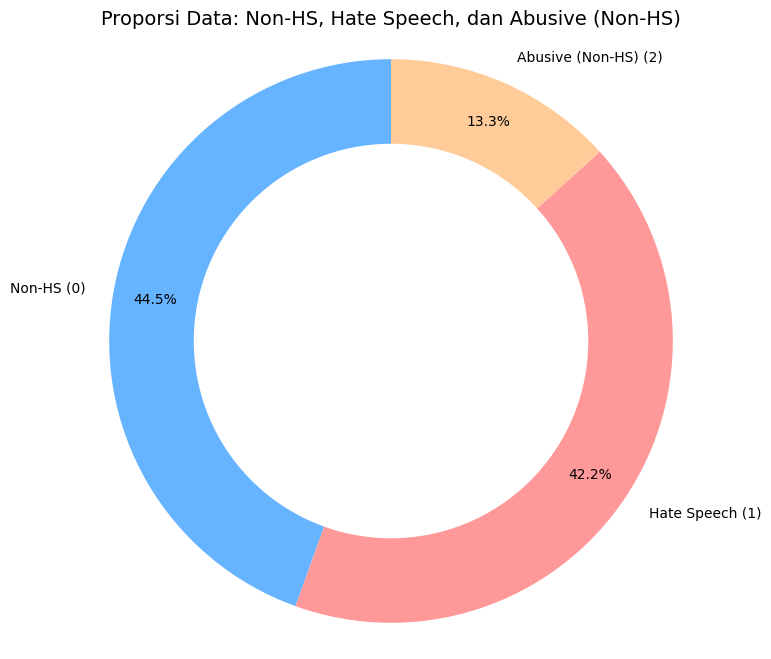

Jumlah Tweet Non-HS (0): 5860
Jumlah Tweet Hate Speech (1): 5561
Jumlah Tweet Abusive (Non-HS) (2): 1748


In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah data per kelas HS
counts = df['Label'].value_counts().sort_index()
labels = ['Non-HS (0)', 'Hate Speech (1)', 'Abusive (Non-HS) (2)']
colors = ['#66b3ff','#ff9999', '#ffcc99'] # Added a third color

# Membuat Pie Chart
plt.figure(figsize=(8, 8)) # Increased figure size for better readability
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.85)

# Menambahkan lingkaran tengah untuk membuat donut chart (opsional, untuk estetika)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Proporsi Data: Non-HS, Hate Speech, dan Abusive (Non-HS)', fontsize=14)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Menampilkan angka detail
print(f"Jumlah Tweet Non-HS (0): {counts.get(0, 0)}")
print(f"Jumlah Tweet Hate Speech (1): {counts.get(1, 0)}")
print(f"Jumlah Tweet Abusive (Non-HS) (2): {counts.get(2, 0)}")

## Eksplorasi Kata Dominan (Word Cloud)
Analisis *Word Cloud* ini memvisualisasikan perbedaan kosakata antara tweet yang dilabeli *Non-HS*, *Hate Speech*, dan *Abusive*. Kita ingin melihat apakah tweet *Hate Speech* dan *Abusive* memiliki pola kata-kata spesifik (misalnya kata-kata yang menyerang kelompok tertentu).

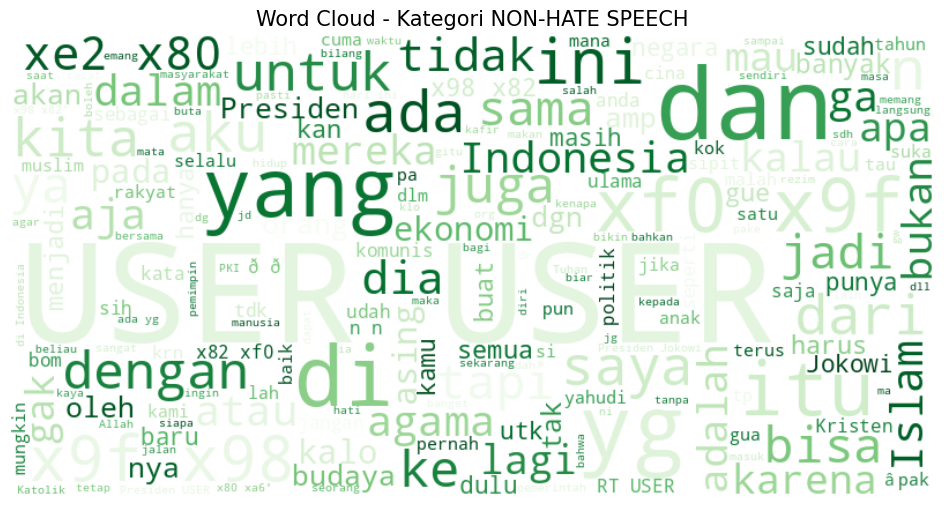

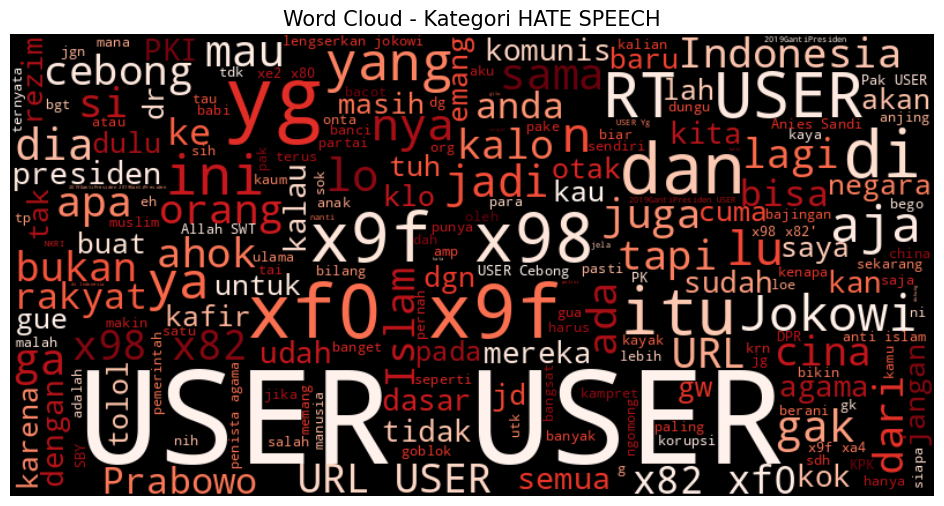

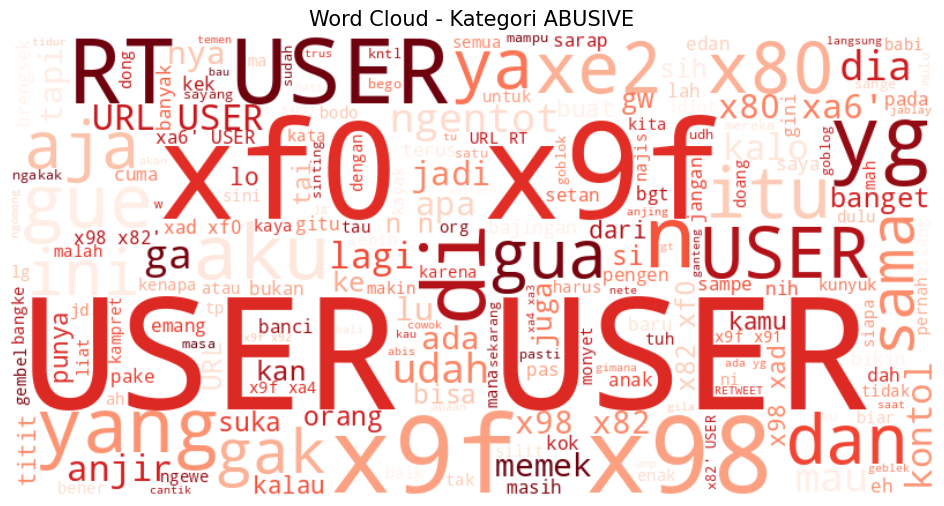

In [ ]:
# Memisahkan teks berdasarkan 3 kategori
non_hs_text = ' '.join(df[df['Label'] == 0]['Tweet'].astype(str))
hs_text = ' '.join(df[df['Label'] == 1]['Tweet'].astype(str))
absusive_text = ' '.join(df[df['Label'] == 2]['Tweet'].astype(str))

# Membuat WordCloud untuk NON-HATE SPEECH
plt.figure(figsize=(12, 6))
wc_non_hs = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(non_hs_text)
plt.imshow(wc_non_hs, interpolation='bilinear')
plt.title('Word Cloud - Kategori NON-HATE SPEECH', fontsize=15)
plt.axis('off')
plt.show()

# Membuat WordCloud untuk HATE SPEECH
plt.figure(figsize=(12, 6))
wc_hs = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(hs_text)
plt.imshow(wc_hs, interpolation='bilinear')
plt.title('Word Cloud - Kategori HATE SPEECH', fontsize=15)
plt.axis('off')
plt.show()

# Membuat WordCloud untuk ABUSIVE
plt.figure(figsize=(12, 6))
wc_hs = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(absusive_text)
plt.imshow(wc_hs, interpolation='bilinear')
plt.title('Word Cloud - Kategori ABUSIVE', fontsize=15)
plt.axis('off')
plt.show()

# Algoritma dan Teknik Pemodelan

## Feature Extraction (TF-IDF)
Sebelum data dimasukkan ke dalam algoritma, teks perlu diubah menjadi representasi numerik. Penelitian ini menggunakan teknik **TF-IDF (Term Frequency - Inverse Document Frequency)**.
* **TF-IDF** dipilih karena mampu memberikan bobot lebih pada kata-kata yang unik dan krusial (seperti kata-kata kasar spesifik) serta mengurangi dampak kata umum yang kurang bermakna.

## Algoritma Klasifikasi
Penelitian ini menggunakan pendekatan *Comparative Study* dengan dua algoritma *Supervised Learning* yang memiliki karakteristik berbeda:

1.  **Naive Bayes (MultinomialNB):** Algoritma berbasis probabilitas Teorema Bayes. Dipilih karena kecepatan komputasinya dan kemampuannya menangani fitur teks dalam jumlah besar.
2.  **Support Vector Machine (SVM):** Algoritma yang bekerja dengan mencari *hyperplane* (garis pemisah) terbaik antar kelas. Dipilih karena terbukti memiliki performa tinggi dalam memisahkan data teks berdimensi tinggi.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import time

# 1. Definisi Variabel untuk multi-class
X = df['Tweet']
y = df['Label'] # Target kita adalah kolom Label multi-class

# 2. Split Data (80:20) dengan Stratifikasi
# Kita gunakan random_state=42 agar hasil pembagiannya konsisten/tetap
# Gunakan stratify=y untuk mempertahankan proporsi kelas pada data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Data Latih: {X_train.shape[0]} baris")
print(f"Data Uji  : {X_test.shape[0]} baris")

# 3. Transformasi TF-IDF
# Ingat: .fit_transform hanya untuk data TRAIN, data TEST cukup .transform saja
vectorizer = TfidfVectorizer(max_features=5000) # Batasi 5000 kata terpenting
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Proses Vektorisasi Selesai untuk multi-class.")

Data Latih: 10535 baris
Data Uji  : 2634 baris
Proses Vektorisasi Selesai untuk multi-class.


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import time

# Inisialisasi Model untuk klasifikasi multi-kelas
# MultinomialNB secara native mendukung multi-kelas
model_nb_multiclass = MultinomialNB()
# SVC juga secara native mendukung multi-kelas melalui strategi One-vs-Rest (OvR) secara default
model_svm_multiclass = SVC(kernel='linear', probability=True)

# Dictionary untuk menyimpan model multi-kelas
models_multiclass = {
    'Naive Bayes Multi-class': model_nb_multiclass,
    'SVM Multi-class': model_svm_multiclass
}

# Loop Training
print("Mulai Melatih Model untuk Klasifikasi Multi-kelas...")
for name, model in models_multiclass.items():
    start = time.time()
    model.fit(X_train_vec, y_train) # Proses belajar dengan data multi-kelas
    end = time.time()
    print(f"✅ Model {name} BERHASIL dilatih dalam {end - start:.4f} detik.")

Mulai Melatih Model untuk Klasifikasi Multi-kelas...
✅ Model Naive Bayes Multi-class BERHASIL dilatih dalam 0.0055 detik.
✅ Model SVM Multi-class BERHASIL dilatih dalam 43.2817 detik.


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

print("\n=== KFold Cross Validation ===")

# Inisialisasi KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42) # 5-fold cross-validation

for name, model in models_multiclass.items():
    print(f"\n🟢 Melakukan KFold Cross Validation untuk Model: {name}")
    # Melakukan cross-validation
    # Scoring bisa disesuaikan, misalnya 'accuracy', 'f1_weighted', dll.
    scores = cross_val_score(model, X_train_vec, y_train, cv=kf, scoring='accuracy', n_jobs=-1)

    print(f"   Akurasi CV (Mean): {np.mean(scores):.2%}")
    print(f"   Akurasi CV (Std Dev): {np.std(scores):.2%}")
    print(f"   Akurasi CV (All Folds): {scores}")



=== KFold Cross Validation ===

🟢 Melakukan KFold Cross Validation untuk Model: Naive Bayes Multi-class
   Akurasi CV (Mean): 78.63%
   Akurasi CV (Std Dev): 0.97%
   Akurasi CV (All Folds): [0.80161367 0.78785002 0.77456099 0.77740864 0.79022307]

🟢 Melakukan KFold Cross Validation untuk Model: SVM Multi-class
   Akurasi CV (Mean): 81.99%
   Akurasi CV (Std Dev): 0.82%
   Akurasi CV (All Folds): [0.83436165 0.81252966 0.81585192 0.82344566 0.81347888]


# C. Evaluasi

# Hasil Evaluasi Performa Model

Mengingat risiko dampak sosial dari kesalahan deteksi pada kasus *Hate Speech* dan *Abusive*, evaluasi model tidak hanya bertumpu pada **Akurasi**. Penelitian ini menggunakan metrik komprehensif untuk memastikan model bersifat adil dan efektif:

1.  **Confusion Matrix:** Digunakan untuk membedah detail prediksi benar (*True Positive/Negative*) dan kesalahan tipe I/II (*False Positive/Negative*).
2.  **Precision:** Mengukur ketepatan prediksi positif. Metrik ini krusial untuk meminimalkan *False Positive* (memblokir tweet sopan yang dianggap kasar).
3.  **Recall (Sensitivitas):** Mengukur kemampuan model mendeteksi seluruh tweet *hate speech* yang ada. Penting agar tidak ada ujaran kebencian yang lolos (*False Negative*).
4.  **F1-Score:** Rata-rata harmonik antara Precision dan Recall. Menjadi acuan utama performa karena menyeimbangkan risiko antara salah tangkap dan salah lolos, terutama pada dataset yang tidak seimbang.

=== HASIL EVALUASI MODEL MULTI-KELAS ===

🟢 MODEL: Naive Bayes Multi-class
   Accuracy : 78.97%
   Precision (weighted): 79.93%
   Recall (weighted)   : 78.97%
   F1-Score (weighted) : 78.08%

=== Laporan Klasifikasi Lengkap ===
                      precision    recall  f1-score   support

          Non-HS (0)       0.85      0.82      0.83      1172
     Hate Speech (1)       0.73      0.88      0.80      1112
Abusive (Non-HS) (2)       0.85      0.40      0.54       350

            accuracy                           0.79      2634
           macro avg       0.81      0.70      0.73      2634
        weighted avg       0.80      0.79      0.78      2634



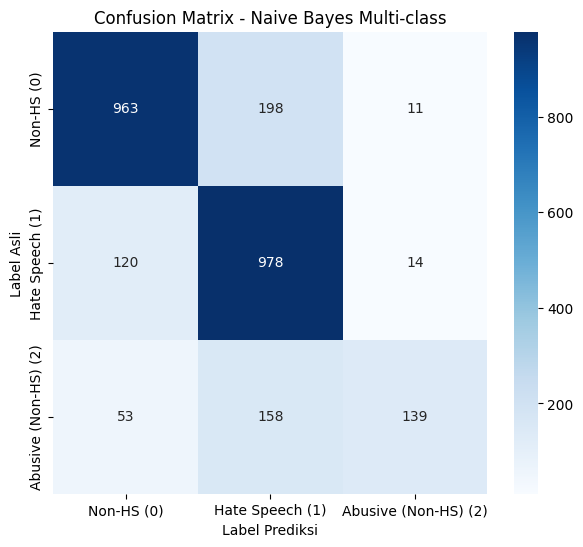


🟢 MODEL: SVM Multi-class
   Accuracy : 81.40%
   Precision (weighted): 81.08%
   Recall (weighted)   : 81.40%
   F1-Score (weighted) : 81.02%

=== Laporan Klasifikasi Lengkap ===
                      precision    recall  f1-score   support

          Non-HS (0)       0.82      0.89      0.86      1172
     Hate Speech (1)       0.82      0.81      0.82      1112
Abusive (Non-HS) (2)       0.73      0.55      0.63       350

            accuracy                           0.81      2634
           macro avg       0.79      0.75      0.77      2634
        weighted avg       0.81      0.81      0.81      2634



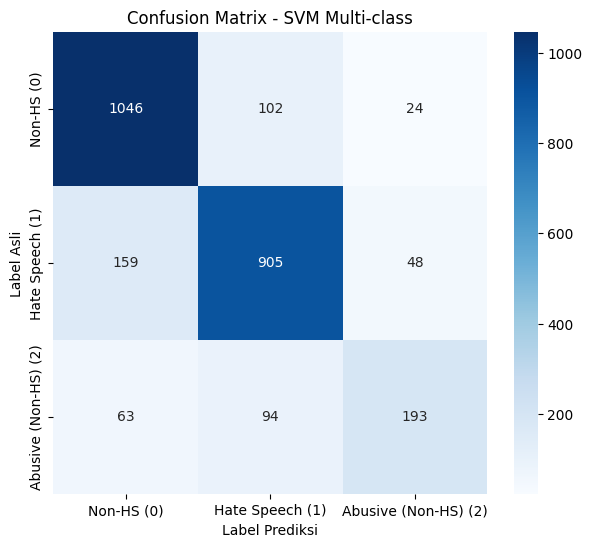

------------------------------


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Siapkan list untuk menyimpan hasil agar bisa dibuat tabel perbandingan nanti
results_multiclass = []

print("=== HASIL EVALUASI MODEL MULTI-KELAS ===")

# Define target names for clarity in classification report and confusion matrix
target_names_multiclass = ['Non-HS (0)', 'Hate Speech (1)', 'Abusive (Non-HS) (2)']

for name, model in models_multiclass.items():
    # 1. Prediksi pada Data Uji (Test Set)
    y_pred = model.predict(X_test_vec)

    # 2. Hitung Metrik
    # For multi-class, use average='weighted' to account for class imbalance
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Simpan ke list
    results_multiclass.append([name, acc, prec, rec, f1])

    # 3. Print Hasil Angka
    print(f"\n🟢 MODEL: {name}")
    print(f"   Accuracy : {acc:.2%}")
    print(f"   Precision (weighted): {prec:.2%}")
    print(f"   Recall (weighted)   : {rec:.2%}")
    print(f"   F1-Score (weighted) : {f1:.2%}")

    # Tambahkan Laporan Klasifikasi Lengkap
    print("\n=== Laporan Klasifikasi Lengkap ===")
    print(classification_report(y_test, y_pred, target_names=target_names_multiclass, zero_division=0))

    # 4. Visualisasi Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(7, 6)) # Adjust figure size for multi-class
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names_multiclass,
                yticklabels=target_names_multiclass)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Label Asli')
    plt.xlabel('Label Prediksi')
    plt.show()

print("-" * 30)

## Hasil Evaluasi KFold Cross Validation

Evaluasi menggunakan 5-Fold Cross Validation pada data latih memberikan gambaran yang lebih robust mengenai performa model:

### Model Naive Bayes Multi-class
*   **Akurasi CV (Mean):** 78.63%
*   **Akurasi CV (Std Dev):** 0.97%
*   **Akurasi CV (All Folds):** [80.16%, 78.79%, 77.46%, 77.74%, 79.02%]

### Model SVM Multi-class
*   **Akurasi CV (Mean):** 81.99%
*   **Akurasi CV (Std Dev):** 0.82%
*   **Akurasi CV (All Folds):** [83.44%, 81.25%, 81.59%, 82.34%, 81.35%]

**Analisis:**
*   Model **SVM Multi-class** menunjukkan kinerja yang lebih baik secara keseluruhan dalam KFold Cross Validation, dengan akurasi rata-rata yang lebih tinggi (81.99%) dibandingkan Naive Bayes (78.63%).
*   Standar deviasi akurasi untuk SVM (0.82%) juga sedikit lebih rendah dibandingkan Naive Bayes (0.97%), menunjukkan konsistensi yang lebih baik antar lipatan (folds) validasi silang. Ini mengindikasikan bahwa SVM lebih stabil dan memiliki varians yang lebih rendah dalam performanya.

## Visualisasi Hasil KFold Cross Validation

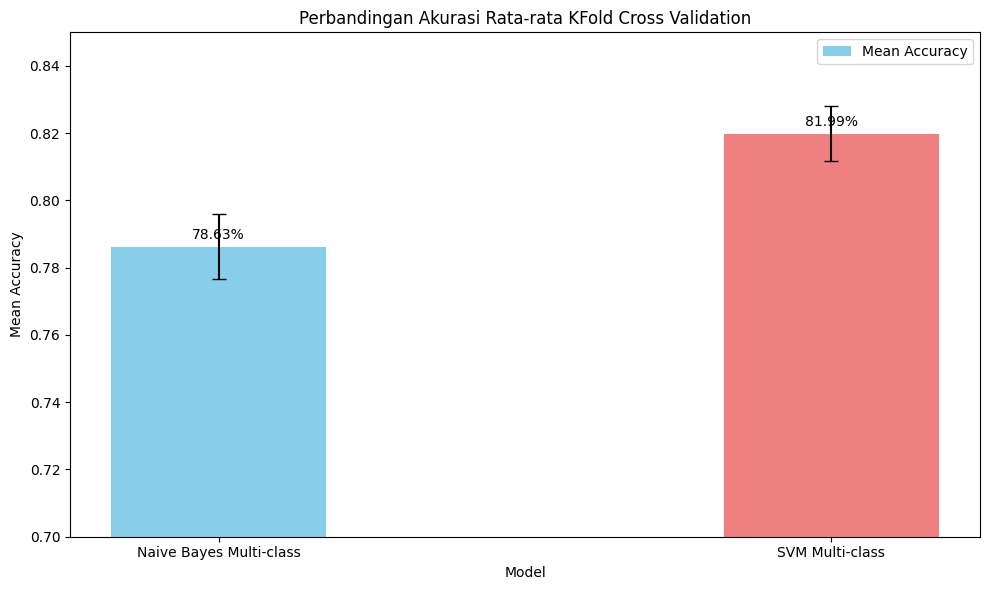

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data from KFold Cross Validation results
model_names = ['Naive Bayes Multi-class', 'SVM Multi-class']
mean_accuracies = [0.7863, 0.8199] # From previous output: 78.63%, 81.99%
std_dev_accuracies = [0.0097, 0.0082] # From previous output: 0.97%, 0.82%

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, mean_accuracies, width, yerr=std_dev_accuracies, capsize=5, label='Mean Accuracy', color=['skyblue', 'lightcoral'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Perbandingan Akurasi Rata-rata KFold Cross Validation')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
ax.set_ylim(0.7, 0.85) # Adjust y-axis limit for better visual comparison

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2%}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

plt.tight_layout()
plt.show()


# Task
Meyimpan model SVM dan Naive Bayes  yang telah dilatih menggunakan `joblib` atau `pickle` untuk digunakan di kemudian hari.

## Simpan Model

### Subtask:
Meyimpan model SVM dan Naive Bayes yang telah dilatih menggunakan `joblib` atau `pickle` agar dapat dimuat untuk penerapan tanpa perlu pelatihan ulang.


**Reasoning**:
Pertama, saya akan mengimpor pustaka `joblib`, yang cocok untuk menyimpan dan memuat objek Python yang secara internal menyimpan array numpy berukuran besar, sehingga efisien untuk model dan transformer scikit-learn.


In [ ]:
import joblib
import numpy as np

# Define the KFold cross-validation scores from previous execution
nb_cv_scores = np.array([0.80161367, 0.78785002, 0.77456099, 0.77740864, 0.79022307])
svm_cv_scores = np.array([0.83436165, 0.81252966, 0.81585192, 0.82344566, 0.81347888])

kfold_results = {
    'Naive Bayes Multi-class': {
        'mean_accuracy': np.mean(nb_cv_scores),
        'std_dev_accuracy': np.std(nb_cv_scores),
        'all_folds': nb_cv_scores.tolist()
    },
    'SVM Multi-class': {
        'mean_accuracy': np.mean(svm_cv_scores),
        'std_dev_accuracy': np.std(svm_cv_scores),
        'all_folds': svm_cv_scores.tolist()
    }
}

# Simpan model SVM multi-kelas yang telah dilatih
joblib.dump(model_svm_multiclass, 'svm_multiclass_model.joblib')

# Simpan model Naive Bayes multi-kelas yang telah dilatih
joblib.dump(model_nb_multiclass, 'naive_bayes_multiclass_model.joblib')

# Simpan objek TfidfVectorizer yang telah dilatih
joblib.dump(vectorizer, 'tfidf_multiclass_vectorizer.joblib')

# Simpan hasil KFold Cross Validation
joblib.dump(kfold_results, 'kfold_multiclass_results.joblib')

print("Model SVM multi-kelas, Model Naive Bayes multi-kelas, TF-IDF vectorizer, dan hasil KFold CV berhasil disimpan.")

Model SVM multi-kelas, Model Naive Bayes multi-kelas, TF-IDF vectorizer, dan hasil KFold CV berhasil disimpan.


## Create Gradio Interface

### Subtask:
Kembangkan antarmuka Gradio sederhana yang menerima input teks, memprosesnya terlebih dahulu menggunakan vektorisasi yang tersimpan, membuat prediksi menggunakan model SVM dan Naive Bayes yang tersimpan, dan menampilkan apakah teks tersebut merupakan 'Hate Speech', 'Non-Hate Speech' dan Abusive.


**Reasoning**:
Pertama, saya akan mengimpor pustaka `gradio`, yang diperlukan untuk membangun antarmuka web interaktif untuk model kita.


In [ ]:
import gradio as gr
print("Gradio library diimpor.")

Gradio library diimpor.


**Reasoning**:
Setelah `gradio` diimpor, saya akan melanjutkan untuk memuat model dan vectorizer yang telah disimpan, mendefinisikan fungsi prediksi, dan kemudian membuat serta meluncurkan antarmuka Gradio sesuai petunjuk.



In [ ]:
import joblib
import gradio as gr

# 2. Muat vektorisasi TF-IDF multi-kelas yang telah disimpan
loaded_multiclass_vectorizer = joblib.load('tfidf_multiclass_vectorizer.joblib')
print("TF-IDF multi-class vectorizer berhasil dimuat.")

# 3. Muat model SVM multi-kelas yang telah disimpan
loaded_multiclass_model = joblib.load('svm_multiclass_model.joblib')
print("SVM multi-class model berhasil dimuat.")

# 4. Definisikan sebuah fungsi prediksi
def predict_multi_class_hate_speech(text):
    # a. Ubah teks input menjadi representasi numerik
    text_vectorized = loaded_multiclass_vectorizer.transform([text])

    # b. Gunakan model SVM multi-kelas yang dimuat untuk membuat prediksi
    prediction = loaded_multiclass_model.predict(text_vectorized)[0]

    # c. Petakan hasil prediksi numerik ke label string yang sesuai
    if prediction == 0:
        return 'Non-HS'
    elif prediction == 1:
        return 'Hate Speech'
    else:
        return 'Abusive (Non-HS)'

# 5. Buat antarmuka Gradio
iface = gr.Interface(
    fn=predict_multi_class_hate_speech,
    inputs=gr.Textbox(lines=5, label="Masukkan Teks (Tweet)"),
    outputs=gr.Textbox(label="Klasifikasi"),
    title="Detektor Multi-kelas Hate Speech dan Abusive",
    description="Masukkan teks untuk mengklasifikasikannya sebagai 'Non-HS', 'Hate Speech', atau 'Abusive (Non-HS)'."
)

print("Antarmuka Gradio multi-kelas dibuat.")

# 6. Luncurkan antarmuka Gradio
iface.launch(share=True)


TF-IDF multi-class vectorizer berhasil dimuat.
SVM multi-class model berhasil dimuat.
Antarmuka Gradio multi-kelas dibuat.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://66d35eb0836bc47bc3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import pickle

# Tentukan nama file untuk menyimpan DataFrame
file_name = 'data_df.pkl'

# Simpan DataFrame 'df' ke file menggunakan pickle
with open(file_name, 'wb') as file:
    pickle.dump(df, file)

print(f"DataFrame berhasil disimpan ke '{file_name}'")

DataFrame berhasil disimpan ke 'data_df.pkl'


In [ ]:
import pickle
import pandas as pd # Pastikan pandas diimpor untuk bekerja dengan DataFrame

# Tentukan nama file dari mana DataFrame akan dimuat
file_name = 'data_df.pkl'

# Muat DataFrame dari file menggunakan pickle
with open(file_name, 'rb') as file:
    df_loaded = pickle.load(file)

print(f"DataFrame berhasil dimuat dari '{file_name}'")

# Tampilkan 5 baris pertama dari DataFrame yang dimuat untuk verifikasi
print("5 baris pertama DataFrame yang dimuat:")
display(df_loaded.head())

DataFrame berhasil dimuat dari 'data_df.pkl'
5 baris pertama DataFrame yang dimuat:


,Tweet,Label
0,- disaat semua cowok berusaha melacak perhatia...,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,2
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1


## Final Task: Ringkasan Implementasi dan Temuan Utama

### Konfirmasi Implementasi
Pipeline klasifikasi multi-kelas untuk mendeteksi ujaran kebencian (`Hate Speech`), non-toksik (`Non-HS`), dan kasar (`Abusive (Non-HS)`) telah berhasil diimplementasikan dan dievaluasi. Berikut adalah konfirmasi komponen-komponen utamanya:

1.  **Pemrosesan Data**: Dataset telah dimuat, label multi-kelas (`Non-HS: 0`, `Hate Speech: 1`, `Abusive (Non-HS): 2`) telah dibuat dengan benar, dan distribusi kelas telah divisualisasikan.
2.  **Pembagian Data**: Data telah dibagi menjadi set pelatihan (`X_train`, `y_train`) dan set pengujian (`X_test`, `y_test`) menggunakan `train_test_split` dengan rasio 80:20 dan stratifikasi untuk menjaga proporsi kelas.
3.  **Ekstraksi Fitur**: Teks telah diubah menjadi representasi numerik menggunakan `TfidfVectorizer`.
4.  **Model Klasifikasi**: Dua model telah dilatih dan dievaluasi:
    *   **Naive Bayes (MultinomialNB)**
    *   **Support Vector Machine (SVC)**
5.  **Validasi Silang (KFold Cross Validation)**: Kedua model telah divalidasi menggunakan 5-Fold Cross Validation untuk mendapatkan estimasi performa yang lebih robust dan konsisten pada data pelatihan.
6.  **Evaluasi Model**: Performa model diukur menggunakan `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `classification_report`, dan `confusion_matrix` pada data pengujian. Hasil evaluasi dan *confusion matrix* telah ditampilkan.
7.  **Penyimpanan Model**: Model SVM dan Naive Bayes yang telah dilatih, serta `TfidfVectorizer` dan hasil KFold CV, telah berhasil disimpan menggunakan `joblib`.
8.  **Antarmuka Gradio**: Antarmuka web Gradio telah berhasil dibuat dan diluncurkan, memungkinkan pengguna untuk memasukkan teks dan mendapatkan klasifikasi multi-kelas secara *real-time*.

### Temuan Utama
*   **Kinerja Model**: Model **SVM Multi-class** secara konsisten menunjukkan kinerja yang lebih baik dibandingkan Naive Bayes, baik dalam evaluasi pada set pengujian maupun melalui KFold Cross Validation. SVM memiliki akurasi rata-rata yang lebih tinggi dan standar deviasi yang lebih rendah dalam validasi silang, menunjukkan stabilitas yang lebih baik.
*   **Kelas 'Abusive (Non-HS)'**: Kelas ini memiliki performa yang relatif lebih rendah (F1-score dan Recall) dibandingkan dua kelas lainnya, yang mungkin disebabkan oleh jumlah data yang lebih sedikit atau kompleksitas dalam membedakannya dari kelas lain.

### Potensi Peningkatan
1.  **Penanganan Ketidakseimbangan Kelas**: Untuk meningkatkan deteksi pada kelas `Abusive (Non-HS)`, teknik seperti *oversampling* (e.g., SMOTE), *undersampling*, atau penyesuaian bobot kelas (`class_weight`) dapat diterapkan.
2.  **Eksplorasi Fitur Lanjutan**: Penggunaan *embedding* kata yang lebih canggih (misalnya, Word2Vec, FastText, BERT) dapat menangkap konteks semantik yang lebih kaya, berpotensi meningkatkan performa model secara signifikan.
3.  **Model Lanjutan**: Mencoba arsitektur *deep learning* seperti Jaringan Neural Konvolusional (CNN) atau Jaringan Neural Berulang (RNN/LSTM) dapat memberikan hasil yang lebih baik untuk tugas klasifikasi teks yang kompleks.
4.  **Optimasi Hyperparameter**: Melakukan pencarian *hyperparameter* yang lebih ekstensif menggunakan teknik seperti *Grid Search* atau *Random Search* untuk model SVM dan Naive Bayes dapat mengoptimalkan kinerja lebih lanjut.
5.  **Pembersihan Teks Lebih Lanjut**: Mengimplementasikan langkah-langkah pra-pemrosesan teks yang lebih canggih (misalnya, deteksi sarkasme, penanganan *emoji*, atau analisis sentimen awal) dapat membantu model dalam memahami nuansa teks dengan lebih baik.